# 01 - Análisis exploratorio
Exploración de los tweets de tráfico para la ciudad de Panamá.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from pathlib import Path

plt.style.use('seaborn-v0_8')


In [10]:
# Resuelve la ruta del repositorio sin depender del punto de ejecución
PROJECT_ROOT = Path.cwd().resolve()
if not (PROJECT_ROOT / "data" / "processed").exists():
    for parent in PROJECT_ROOT.parents:
        candidate = parent / "data" / "processed"
        if candidate.exists():
            PROJECT_ROOT = parent
            break
    else:
        raise FileNotFoundError("No se encontró el directorio 'data/processed'. Ejecuta el notebook desde el repo o ajusta la ruta.")

DATA_PATH = PROJECT_ROOT / "data" / "processed" / "train.csv"
if not DATA_PATH.exists():
    raise FileNotFoundError(f"No se encontró el archivo: {DATA_PATH}")

df = pd.read_csv(DATA_PATH)
df.head()


,clean_text,category,text,created_at,location
0,vistas tráfico avenida santa clara ambas direc...,obstaculo,"Vistas del tráfico en la Avenida Santa Clara, ...",2018-12-17 14:01:49-05:00,NaN
1,video accidente tránsito vía centenario cerca ...,accidente,[VIDEO] Accidente de tránsito en la Vía Centen...,2021-09-30 07:19:18-05:00,NaN
2,estudiantes escuela i p t fernando lesseps cie...,obstaculo,Estudiantes de la escuela I.P.T. Fernando de L...,2019-04-04 10:45:19-05:00,NaN
3,10km h desplazan autos corredor norte altura s...,obstaculo,A 10km/h se desplazan los autos en el Corredor...,2020-12-23 17:34:36-05:00,NaN
4,retweeted estelia acevedo expliqueme consumo,informativo,Retweeted Estelia Acevedo A. ( @aaestelia ): ...,2018-07-20 14:56:21-05:00,NaN


<Axes: title={'center': 'Eventos por categoría'}, xlabel='category'>

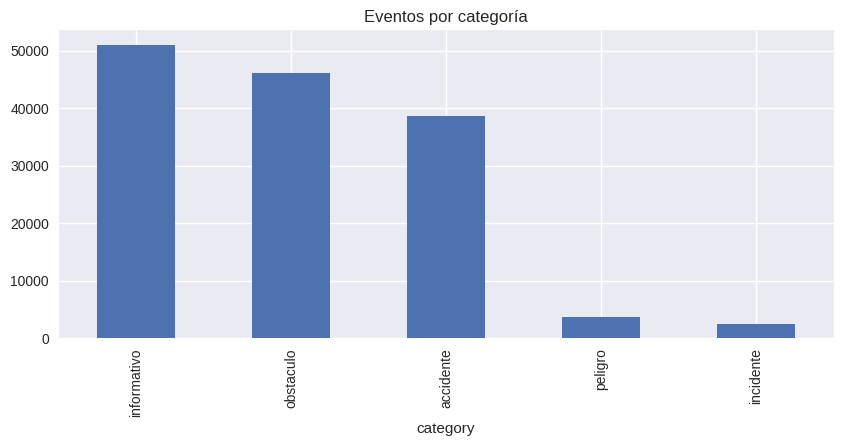

In [11]:
df['category'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(10, 4), title='Eventos por categoría')

In [12]:
location_counts = (
    df['location']
    .dropna()
    .astype(str)
    .str.strip()
    .replace('', pd.NA)
    .dropna()
    .value_counts()
    .head(10)
)

if location_counts.empty:
    print('Sin ubicaciones registradas en los datos procesados.')
else:
    location_counts.plot(kind='barh', figsize=(10, 4), title='Top ubicaciones mencionadas')


Sin ubicaciones registradas en los datos procesados.


Text(0.5, 1.0, 'Nube de palabras - tweets limpiados')

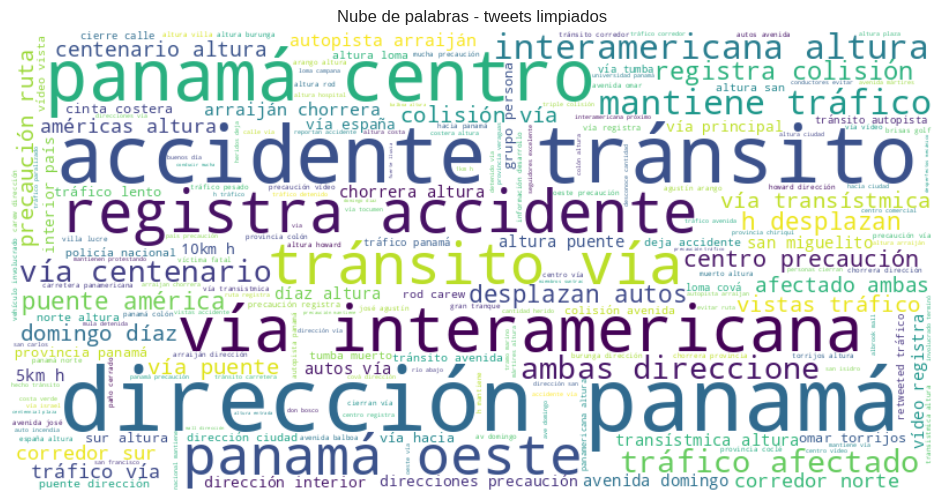

In [13]:
text = ' '.join(df['clean_text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - tweets limpiados')

Text(70.72222222222221, 0.5, 'Real')

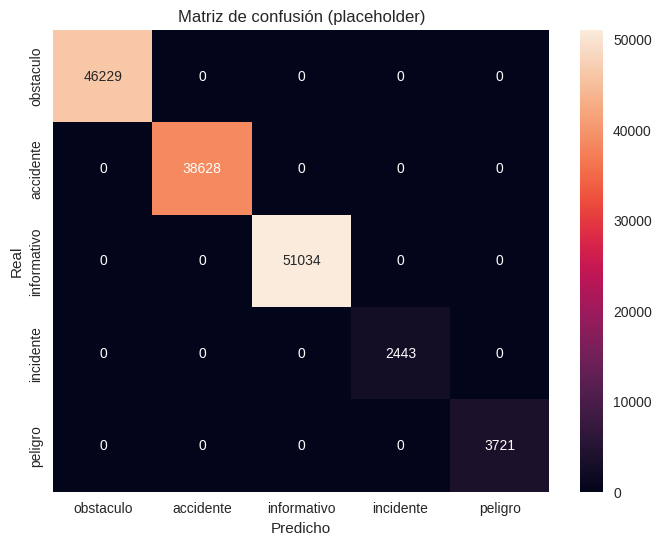

In [14]:
from sklearn.metrics import confusion_matrix

# Placeholder: reemplazar con predicciones reales
predictions = df['category']
labels = df['category'].unique()
cm = confusion_matrix(df['category'], predictions, labels=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de confusión (placeholder)')
plt.xlabel('Predicho')
plt.ylabel('Real')